#MACHINE LEARNING MODEL EVALUATION ON CRIMINAL DATASET OF BANGLADESH.
##Objective:
The objective of this project is to analyze traditional machine learning models to predict crimes in bangladesh.
##Dataset:
The dataset contains aggregated counts of different 
types of crime categorized by the police department of 
Bangladesh from the year 2010 to 2019. The dataset is divided into two groups according to the region of Bangladesh: metropolitan region data and 
divisional region data. The dataset consists of 1.6 million cases or 
crimes that had been collected from across the country in 10 years.

In [1]:
#import Modules
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
import matplotlib
import pandas
import sklearn
print('All imported')

Python: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
scipy: 1.4.1
All imported


In [ ]:
#Load Libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
print('Loaded')

Loaded


In [4]:
#load dataset
from google.colab import files 


uploaded = files.upload()

Saving crimedataset.csv to crimedataset (1).csv


In [5]:
#Displaying Dataset
import pandas as pd 
import io 

df = pd.read_csv(io.BytesIO(uploaded['crimedataset.csv'])) 
print(df)


         Unit Name  Dacoity  Robbery  ...  Smuggling  Total  Total Cases
0              DMP       47      220  ...        144  11279        23519
1              CMP       16      108  ...         99   1016         4063
2              KMP        3        9  ...         13    826         1767
3              RMP        4       20  ...        248    587         1571
4              BMP        8       12  ...        117    289         1139
..             ...      ...      ...  ...        ...    ...          ...
175  Rangpur Range        1        2  ...         94    649         1472
176  Railway Range        0        1  ...         12     67           84
177            GMP        2        3  ...          2    135          244
178           RPMP        0        0  ...          0     68          121
179            ATU        0        0  ...          0      0            0

[180 rows x 18 columns]


In [6]:
print(df.shape)

(180, 18)


In [7]:
df.head()

,Unit Name,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling,Total,Total Cases
0,DMP,47,220,245,363,3,1370,139,155,555,1915,7228,518,82,10535,144,11279,23519
1,CMP,16,108,94,31,7,455,37,31,123,314,1831,51,0,866,99,1016,4063
2,KMP,3,9,29,25,0,153,11,4,65,91,551,19,2,792,13,826,1767
3,RMP,4,20,21,9,15,157,9,12,53,106,578,3,4,332,248,587,1571
4,BMP,8,12,19,21,0,112,6,8,24,83,557,17,0,155,117,289,1139


In [8]:
del df["Total"]

In [9]:
df.head()

,Unit Name,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling,Total Cases
0,DMP,47,220,245,363,3,1370,139,155,555,1915,7228,518,82,10535,144,23519
1,CMP,16,108,94,31,7,455,37,31,123,314,1831,51,0,866,99,4063
2,KMP,3,9,29,25,0,153,11,4,65,91,551,19,2,792,13,1767
3,RMP,4,20,21,9,15,157,9,12,53,106,578,3,4,332,248,1571
4,BMP,8,12,19,21,0,112,6,8,24,83,557,17,0,155,117,1139


In [10]:
df.describe()

,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling,Total Cases
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,26.072222,45.611111,201.850000,75.911111,4.333333,972.783333,37.522222,34.722222,132.861111,368.672222,4264.494444,95.344444,28.833333,2817.294444,295.555556,9401.861111
std,40.517605,60.305589,293.601761,112.382740,8.263807,1324.042731,50.667991,52.540706,181.954558,515.365779,5641.395295,142.875667,55.691840,4194.012161,541.533218,11774.257629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,15.000000,2.000000,0.000000,11.750000,1.000000,1.000000,2.000000,30.000000,129.500000,3.000000,0.000000,177.500000,2.000000,717.500000
50%,6.000000,19.500000,37.000000,21.500000,0.000000,167.000000,12.000000,14.000000,49.000000,116.500000,735.000000,22.500000,4.000000,807.000000,52.500000,1983.500000
75%,36.000000,62.250000,278.000000,107.750000,5.000000,1640.500000,54.250000,40.250000,155.250000,477.000000,7003.500000,138.500000,27.250000,3496.250000,201.250000,18547.000000
max,184.000000,294.000000,1395.000000,563.000000,56.000000,5115.000000,204.000000,336.000000,686.000000,2240.000000,22429.000000,723.000000,387.000000,22682.000000,2509.000000,44536.000000


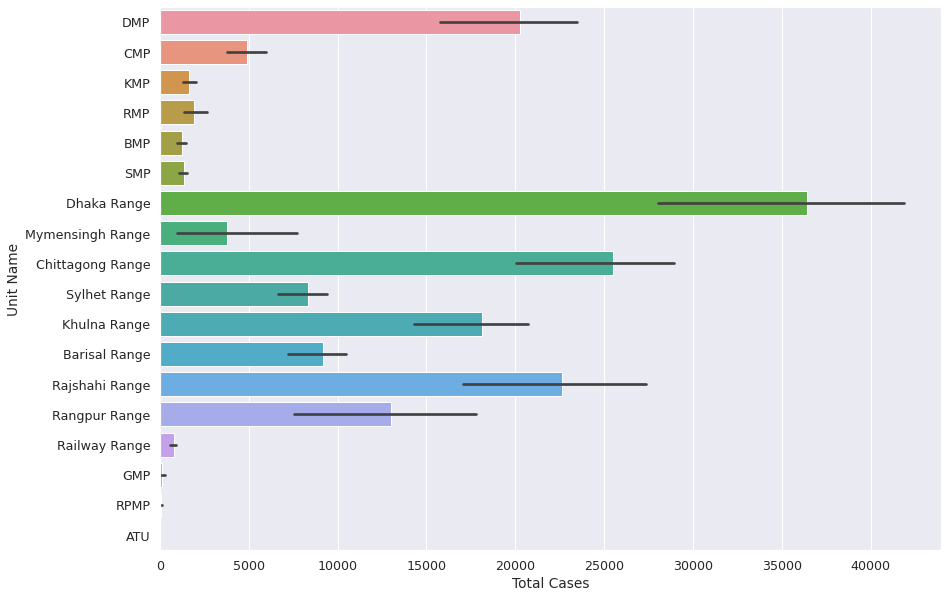

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.barplot(x = "Total Cases", y = "Unit Name", data = df)
plt.show()

##Here we can see that Dhaka Range has the most cases in 10 years span.

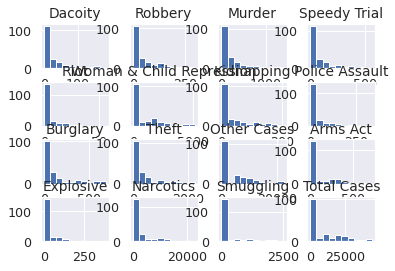

<Figure size 1008x720 with 0 Axes>

In [15]:
df.hist()
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
plt.show()

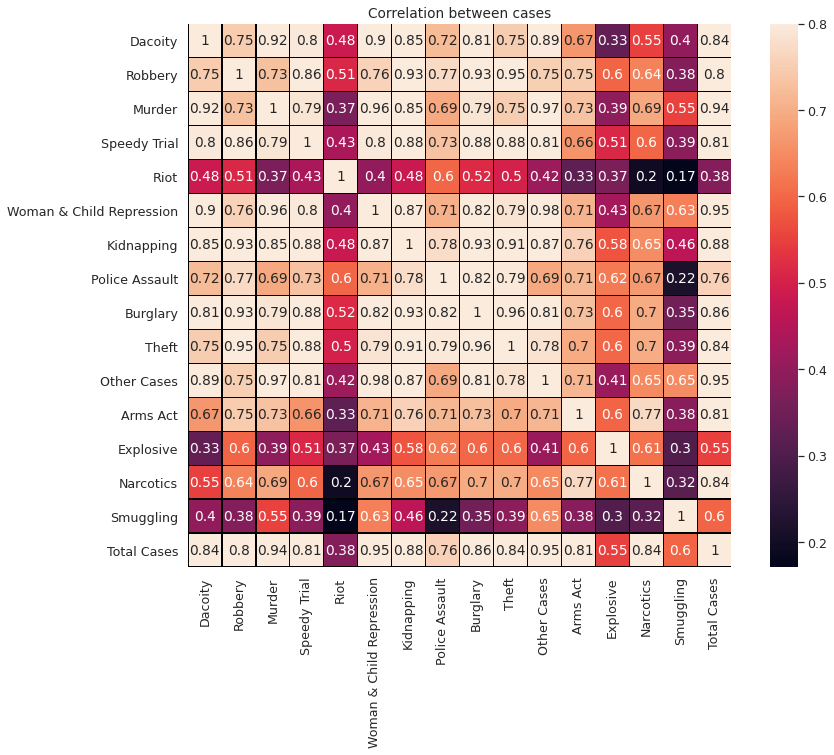

In [16]:
corr=df.corr()

sns.set_theme()
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.5,
            square=True,annot=True,linecolor="black")
plt.title('Correlation between cases');

In [17]:
del df["Total Cases"]

In [18]:
df.head()

,Unit Name,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling
0,DMP,47,220,245,363,3,1370,139,155,555,1915,7228,518,82,10535,144
1,CMP,16,108,94,31,7,455,37,31,123,314,1831,51,0,866,99
2,KMP,3,9,29,25,0,153,11,4,65,91,551,19,2,792,13
3,RMP,4,20,21,9,15,157,9,12,53,106,578,3,4,332,248
4,BMP,8,12,19,21,0,112,6,8,24,83,557,17,0,155,117


In [19]:
del df["Unit Name"]

#**MACHINE LEARNING MODELS DEPLOYMENT**

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##**Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy  24.444444444444443


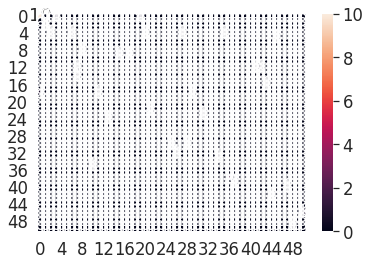

In [22]:
#Model
LR = LogisticRegression(solver='lbfgs', max_iter=100000000000000000000)

#Fitting the model
LR.fit(X_train, y_train)

#Prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

##**Decision Tree**

Accuracy  22.22222222222222


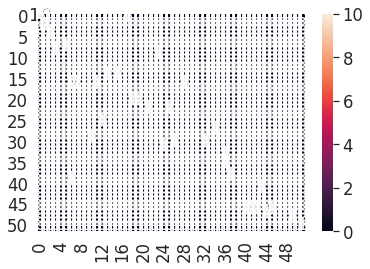

In [25]:
#Model
DT = DecisionTreeClassifier()

#Fitting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

##**XG BOOST**

Accuracy  22.22222222222222


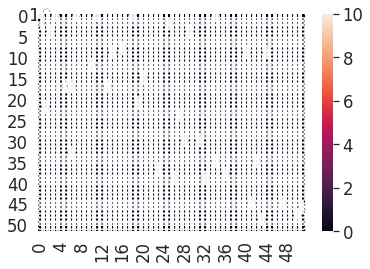

In [26]:
#Model
model = GradientBoostingClassifier()

#Fitting the model
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#**SVM**

Accuracy  26.666666666666668


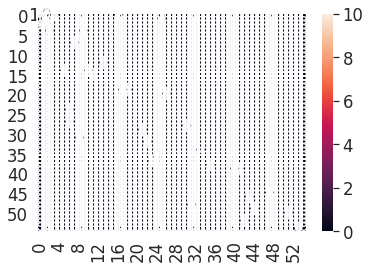

In [27]:
#Model
model = svm.SVC(kernel = 'linear',probability=True)

#Fitting the model
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#**KNN**

Accuracy  26.666666666666668


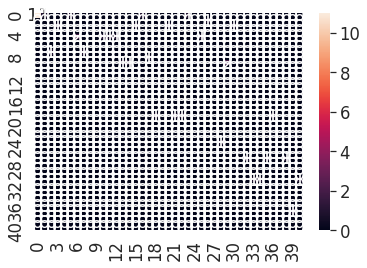

In [28]:
#Model
model = KNeighborsClassifier(n_neighbors = 10)

#Fitting the model
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#**Random Forest**

Accuracy  22.22222222222222


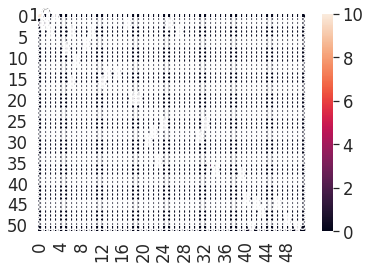

In [29]:
#Model
model = RandomForestClassifier(n_estimators = 100)

#Fitting the model
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()